### Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

### Load Data

In [2]:
dataframe = pd.read_csv("abalone.csv")
dataframe.dropna() #Removes Missing Values

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
#Convert Dataframe to Dataset
def df_to_ds(dataframe, selected_features, selected_targets, batch_size=32):
    features = dataframe[selected_features]
    targets = dataframe[selected_targets]
    ds = tf.data.Dataset.from_tensor_slices((dict(features), np.array(targets)))
    ds = ds.batch(batch_size)
    return ds

In [4]:
#Selected Features and Target
selected_features = [
    "sex",
    "length",
    "diameter",
    "height",
    "rings"]

selected_targets = ["whole-weight"]

#Feature Columns
sex_vocab_list = ["M", "F", "I"]

feature_columns = [
    tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_vocabulary_list("sex", sex_vocab_list)),
    tf.feature_column.numeric_column("length"),
    tf.feature_column.numeric_column("diameter"),
    tf.feature_column.numeric_column("height"),
    tf.feature_column.numeric_column("rings")
]

#Create Tensorflow Datasets
train_per = 0.6
validation_per = 0.3
test_per = 0.1
batch_size = 32

train_dataframe, test_dataframe = train_test_split(dataframe, test_size=test_per)
train_dataframe, validation_dataframe = train_test_split(train_dataframe, test_size=validation_per / (1 - test_per))

train_dataset = df_to_ds(
    train_dataframe,
    selected_features,
    selected_targets,
    batch_size=batch_size)
validation_dataset = df_to_ds(
    validation_dataframe,
    selected_features,
    selected_targets,
    batch_size=batch_size)
test_dataset = df_to_ds(
    test_dataframe,
    selected_features,
    selected_targets,
    batch_size=batch_size)

### Create Models

In [5]:
linear_model = tf.keras.models.Sequential([
    tf.keras.layers.DenseFeatures(feature_columns),
    tf.keras.layers.Dense(1)
])

linear_model.compile(
    optimizer="adam",
    loss="mean_squared_error")

In [6]:
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.DenseFeatures(feature_columns),
    tf.keras.layers.Dense(10, activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(5, activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(1)
])

nn_model.compile(
    optimizer="adam",
    loss="mean_squared_error")

### Train Models

In [7]:
def plot_loss(model):
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.tight_layout()
    plt.plot(model.history.history["loss"], label="loss")
    if("val_loss" in model.history.history.keys()):
        plt.plot(model.history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



79/79 - 2s - loss: 44.0289 - val_loss: 37.5447
Epoch 2/10
79/79 - 1s - loss: 31.9523 - val_loss: 26.9500
Epoch 3/10
79/79 - 1s - loss: 22.6496 - val_loss: 18.8847
Epoch 4/10
79/79 - 2s - loss: 15.6625 - val_loss: 12.9121
Epoch 5/10
79/79 - 2s - loss: 10.5666 - val_loss: 8.6242
Epoch 6/10
79/79 - 2s - loss: 6.9694 - val_loss: 5.6487
Epoch 7/10
79/79 - 2s - loss: 4.5185 - val_loss: 3.6575
Epoch 8/10
79/79 - 1s - loss: 2.9102 - val_loss: 2.3740
Epoch 9/10
79/79 - 1s - loss: 1.8941 - val_loss: 1.5765
Epoch 10/10
79/79 - 1s - loss: 1.2752 - val_loss: 1.0969


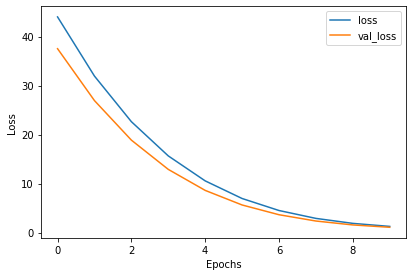

In [8]:
linear_model.fit(train_dataset, validation_data=validation_dataset, epochs=10, verbose=2)

plot_loss(linear_model)

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



79/79 - 2s - loss: 0.2624 - val_loss: 0.1865
Epoch 2/20
79/79 - 2s - loss: 0.1613 - val_loss: 0.1774
Epoch 3/20
79/79 - 2s - loss: 0.1545 - val_loss: 0.1702
Epoch 4/20
79/79 - 2s - loss: 0.1485 - val_loss: 0.1636
Epoch 5/20
79/79 - 2s - loss: 0.1430 - val_loss: 0.1574
Epoch 6/20
79/79 - 1s - loss: 0.1378 - val_loss: 0.1515
Epoch 7/20
79/79 - 1s - loss: 0.1329 - val_loss: 0.1456
Epoch 8/20
79/79 - 1s - loss: 0.1277 - val_loss: 0.1382
Epoch 9/20
79/79 - 1s - loss: 0.1224 - val_loss: 0.1328
Epoch 10/20
79/79 - 1s - loss: 0.1181 - val_loss: 0.1279
Epoch 11/20
79/79 - 1s - loss: 0.1139 - val_loss: 0.1230
Epoch 12/20
79/79 - 1s - loss: 0.1095 - val_loss: 0.1180
Epoch 13/20
79/79 - 2s - loss: 0.1029 - val_loss: 0.1034
Epoch 14/20
79/79 - 1s - loss: 0.0915 - val_loss: 0.0955
Epoch 15/20
79/79 - 2s - loss: 0.0843 - val_loss: 0.0879
Epoch 16/20
79/79 - 1s - loss: 0.0773 - val_loss: 0.0802
Epoch 17/20
79/79 - 2s - loss: 0.0697 - val_loss: 0.0715
Epoch 18/20
79/79 - 2s - loss: 0.0604 - val_loss: 0

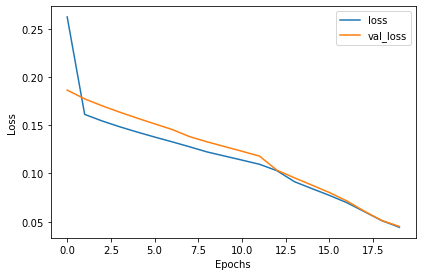

In [9]:
nn_model.fit(train_dataset, validation_data=validation_dataset,epochs=20, verbose=2)

plot_loss(nn_model)

### Evaluations

In [10]:
linear_evaluation = linear_model.evaluate(test_dataset)
print("MSE:", linear_evaluation, "RMSE:", math.sqrt(linear_evaluation))

14/14 [==============================] - 0s 24ms/step - loss: 1.1332
MSE: 1.1332049369812012 RMSE: 1.0645209894507488


In [11]:
nn_evaluation = nn_model.evaluate(test_dataset)
print("MSE:", nn_evaluation, "RMSE:", math.sqrt(nn_evaluation))

14/14 [==============================] - 0s 15ms/step - loss: 0.0495
MSE: 0.04954521730542183 RMSE: 0.22258754975384815


### Predictions

In [12]:
labels = test_dataframe[selected_targets].reset_index(drop=True)

In [13]:
linear_predictions = pd.DataFrame(linear_model.predict(test_dataset).flatten()).join(labels)
linear_predictions.columns = ["predictions", "labels"]
linear_predictions["difference"] = linear_predictions["predictions"] - linear_predictions["labels"]
linear_predictions

,predictions,labels,difference
0,0.464819,0.2330,0.231819
1,0.975187,0.4470,0.528187
2,-0.061294,0.9700,-1.031294
3,0.907480,0.6245,0.282980
4,-0.321871,1.3025,-1.624371
...,...,...,...
413,-0.018007,0.7310,-0.749007
414,0.237946,0.8440,-0.606054
415,0.120440,1.0570,-0.936560
416,-0.051861,0.5150,-0.566861


In [14]:
nn_predictions = pd.DataFrame(nn_model.predict(test_dataset).flatten()).join(labels)
nn_predictions.columns = ["predictions", "labels"]
nn_predictions["difference"] = nn_predictions["predictions"] - nn_predictions["labels"]
nn_predictions

,predictions,labels,difference
0,0.330716,0.2330,0.097716
1,0.447027,0.4470,0.000027
2,1.108455,0.9700,0.138455
3,0.591132,0.6245,-0.033368
4,1.139032,1.3025,-0.163468
...,...,...,...
413,0.910211,0.7310,0.179211
414,0.995969,0.8440,0.151969
415,0.914084,1.0570,-0.142916
416,0.741247,0.5150,0.226247


### Backend

#### Linear

In [15]:
linear_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features (DenseFeature multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [16]:
linear_model.history.params

{'verbose': 0, 'epochs': 1, 'steps': 14}

In [17]:
for layer in linear_model.layers:
    print(layer.get_weights())

[]
[array([[ 0.19913013],
       [ 1.3394881 ],
       [ 0.32746294],
       [-0.1132816 ],
       [ 0.23246096],
       [ 0.3145707 ],
       [ 0.9460177 ]], dtype=float32), array([0.46742728], dtype=float32)]


#### Neural Network

In [18]:
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features_1 (DenseFeatu multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  80        
_________________________________________________________________
dense_2 (Dense)              multiple                  55        
_________________________________________________________________
dense_3 (Dense)              multiple                  6         
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [19]:
nn_model.history.params

{'verbose': 0, 'epochs': 1, 'steps': 14}

In [20]:
for layer in nn_model.layers:
    print(layer.get_weights())

[]
[array([[ 1.05460441e+00,  7.65016317e-01, -1.27260447e-01,
        -7.47723281e-01,  1.61135364e+00,  1.27503264e+00,
         5.89039803e-01, -1.88125908e-01, -6.05791271e-01,
        -8.85510683e-01],
       [ 3.49389315e-01,  5.59943378e-01, -8.89693260e-01,
        -6.48025155e-01,  1.58312273e+00,  1.16633308e+00,
         9.31029320e-01, -3.76970828e-01, -7.20847845e-01,
        -1.40687034e-01],
       [ 3.10932279e-01,  1.54645488e-01, -9.08316493e-01,
         1.54791206e-01,  6.92883909e-01,  1.14552438e+00,
         2.86846638e-01,  3.62262160e-01, -2.27170618e-04,
        -3.40597004e-01],
       [ 3.46952409e-01,  5.94493235e-03,  2.11266428e-02,
         3.79292518e-02, -4.26656008e-02,  1.27538040e-01,
         4.66113210e-01,  5.01997173e-01, -1.64949670e-01,
         5.10029852e-01],
       [-3.23886275e-01,  1.85021594e-01, -1.55289710e-01,
         6.57139599e-01, -1.77295685e-01,  2.02323087e-02,
        -2.75399178e-01,  2.69943118e-01, -5.76741338e-01,
       